In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 
import os

filepath = os.path.join(os.getcwd(),'CSV_Files','ninja_reports.xls')
df = pd.read_excel('ninja_reports2.xls',sheet_name='ninja_reports')

In [14]:
df.head(40)

,id,createdAt,updateAt,userId,title_id,title,category,description,latitude,longitude,...,civic_agency,civic_agency_title,civic_agency_number,jg_category_id,jg_category,jg_sub_category,user_status,status_id,city_id,createdInJanagraha
0,2529,2019-02-26 08:51:18,2019-10-17 12:54:15,1322,0,Garbage,6,Garbage behind the temple,12.925020,77.590748,...,BBMP,BBMP,8.022660e+09,155,Garbage and Unsanitary Practices,Garbage,1,3,1.0,1
1,2540,2019-02-26 20:58:20,2019-09-04 23:21:36,1453,0,Air Pollution,1,Air pollution,13.045039,77.590984,...,KSPCB,KSPCB,8.025581e+09,44,Pollution,Air Pollution,1,1,1.0,1
2,2542,2019-02-26 21:04:38,2019-09-04 23:21:36,1453,0,Air Pollution,1,Air pollution in hebbal,13.030531,77.587002,...,KSPCB,KSPCB,8.025581e+09,44,Pollution,Air Pollution,1,1,1.0,1
3,2550,2019-02-27 07:43:14,2019-10-17 12:54:15,1322,0,Garbage,6,Garbage is dumped near BES,12.926228,77.588806,...,BBMP,BBMP,8.022660e+09,155,Garbage and Unsanitary Practices,Garbage,1,3,1.0,1
4,2552,2019-02-27 09:34:35,2019-09-04 23:21:36,622,0,Air Pollution,1,Leaf and garbage burning on Shakthi Ganapathi ...,12.925195,77.590896,...,KSPCB,KSPCB,8.025581e+09,44,Pollution,Air Pollution,1,1,1.0,1
5,2553,2019-02-27 17:06:02,2019-10-17 12:54:15,876,0,Garbage,6,There is a lot of garbage dump in and around t...,12.956251,77.710715,...,BBMP,BBMP,8.022660e+09,155,Garbage and Unsanitary Practices,Garbage,1,3,1.0,1
6,2554,2019-02-28 05:59:43,2019-09-05 08:00:02,1322,0,Maintenance/Repair Of Streetlights,2,Replace broken streetlight. Complaint #5 about...,12.948437,77.569115,...,BBMP,BBMP,8.022660e+09,62,Streetlights,Maintenance/Repair Of Streetlights,1,3,1.0,1
7,2555,2019-02-28 09:43:43,2019-07-31 16:20:31,1898,190,Parking On Footpath,5,Red Matiz parked on the footpath for more than...,12.950711,77.568224,...,NaN,NaN,NaN,190,Parking On Footpath,NaN,1,1,1.0,0
8,2556,2019-02-28 09:49:15,2019-07-31 16:20:31,1898,190,Parking On Footpath,5,Cars have been using the footpath as a parking...,12.950390,77.568743,...,NaN,NaN,NaN,190,Parking On Footpath,NaN,1,1,1.0,0
9,2560,2019-03-01 08:42:25,2019-07-31 16:20:31,1905,84,Traffic Jams/Congestion Or Bottlenecks,5,Congestion everyday and at all times due to im...,12.932159,77.541598,...,NaN,NaN,NaN,84,Traffic Jams/Congestion Or Bottlenecks,NaN,2,3,1.0,1


In [15]:
city_ids = list(df.city_id.unique())
print(city_ids)

[1.0, 36.0, 0.0, 2.0, 72.0, 123.0, nan, 305.0, 6.0, 4.0, 39.0, 277.0, 132.0, 53.0]


In [16]:
df.count()

id                     10723
createdAt              10723
updateAt               10723
userId                 10723
title_id               10723
title                  10723
category               10723
description            10723
latitude               10723
longitude              10723
landmark               10318
location                9993
web_url                 5569
ward_id                10698
ward_title              9234
civic_agency            4667
civic_agency_title      4667
civic_agency_number     5651
jg_category_id         10723
jg_category            10723
jg_sub_category         5569
user_status            10723
status_id              10723
city_id                10719
createdInJanagraha     10723
dtype: int64

In [17]:
df = df.drop(columns = ['jg_sub_category','title_id'])

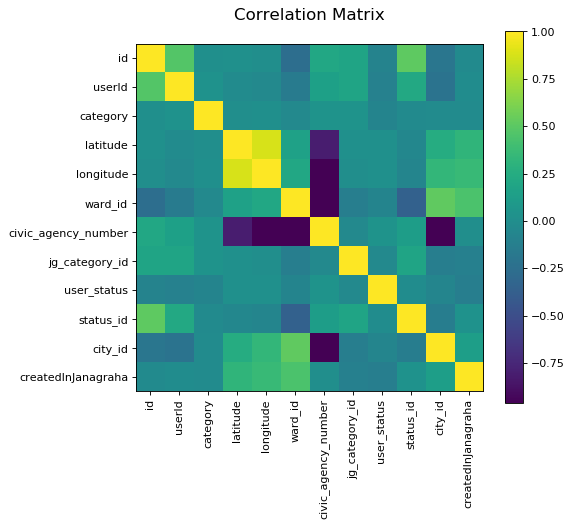

In [18]:
#Correlation Matrix
corr = df.corr()
plt.figure(num=None, figsize=(7, 6), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix', fontsize=15)
plt.show()


In [19]:
def isint(n):
    try:
        int(n)
        return n
    except:
        return -1;

ward_count = 0
for i in df.ward_id:
    if(i<=198):
        ward_count+=1
print("Noise: ",ward_count)

Noise:  6869


In [20]:
l = list(df.ward_id.unique())
len(l)

303

In [21]:
c_count = 0
for i in df.location:
    if pd.isna(i):
            c_count+=1
print("Count : ",c_count)

Count :  730


In [22]:
title = list(df.title.unique())
print(title,len(title))

['Garbage', 'Air Pollution', 'Maintenance/Repair Of Streetlights', 'Parking On Footpath', 'Traffic Jams/Congestion Or Bottlenecks', 'Garbage Dumping In Vacant Lot/Land', 'Wrong Parking', 'Removal Of Illegal Posters And Hoardings', 'Dangling Or Hanging Of OFCs/Cables/Wires', 'Implementation Of Waste Segregation/Garbage', 'Clearance Of Garbage Dump Or Black Spot', 'Provide Sewage lines', 'Clearing Of Roadside Dustbin', 'Maintenance And Repair Of Sewage Lines', 'Maintenance And Repair Of Manholes', 'Regular Supply Of Electricity', 'Collection Of Door-to-door Garbage', 'Fixing/Reparing Potholes', 'Wrong parking', 'Maintenance Of Lake Surrounding', 'Stop Water Leakage', 'Flooding/Waterlogging Of Roads And Footpaths', 'Single Use plastic generator', 'BPAC – Black Spot'] 24


{6: 6129, 1: 333, 2: 1178, 5: 662, 7: 1548, 4: 193, 9: 680}


([<matplotlib.patches.Wedge at 0x20aceebb9e8>,
 [Text(-0.24526668961402678, 1.0723079086558007, '6'),
  Text(-0.9393368107506592, -0.5724040146337028, '1'),
  Text(-0.6035870969350359, -0.9196100349678312, '2'),
  Text(-0.045910922685439975, -1.0990414856492778, '5'),
  Text(0.6262984879178949, -0.9042954185617433, '7'),
  Text(0.9880903022759902, -0.4834020630367052, '4'),
  Text(1.078242385745051, -0.21770015522001965, '9')],
 [Text(-0.13378183069856003, 0.584895222903164, '57.16'),
  Text(-0.5123655331367232, -0.3122203716183833, '3.11'),
  Text(-0.32922932560092866, -0.5016054736188169, '10.99'),
  Text(-0.02504232146478544, -0.599477173990515, '6.17'),
  Text(0.34161735704612445, -0.49325204648822357, '14.44'),
  Text(0.5389583466959945, -0.26367385256547554, '1.80'),
  Text(0.5881322104063914, -0.11874553921091979, '6.34')])

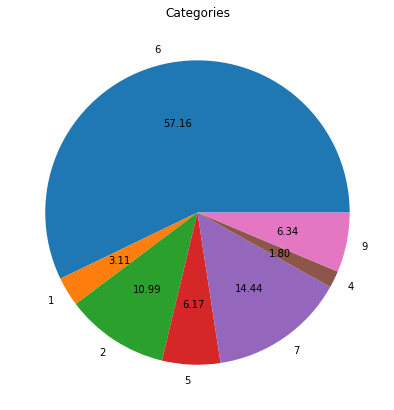

In [23]:
cat = {}
for i in df.category.unique():
    cat[i] = 0

for i in df.category:
    cat[i] +=1

print(cat)
plt.figure(figsize = (7,7))
plt.title("Categories")
plt.pie(cat.values(),labels = cat.keys(),autopct = '%.2f')

In [24]:
chennai = [str(i) for i in df.location if 'Chennai' in str(i)]
for i in chennai:
    df.drop(d)

NameError: name 'd' is not defined

In [25]:
for i in df.category:
    cat[i] +=1

print(cat)

{6: 12258, 1: 666, 2: 2356, 5: 1324, 7: 3096, 4: 386, 9: 1360}


C:\Users\Adithi Satish\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([ 169.,   32.,   72.,  630., 3343., 2032., 2062., 1481.,  606.,
         296.]),
 array([737116.36895833, 737149.62740972, 737182.88586111, 737216.1443125 ,
        737249.40276389, 737282.66121528, 737315.91966667, 737349.17811806,
        737382.43656944, 737415.69502083, 737448.95347222]),
 <a list of 10 Patch objects>)

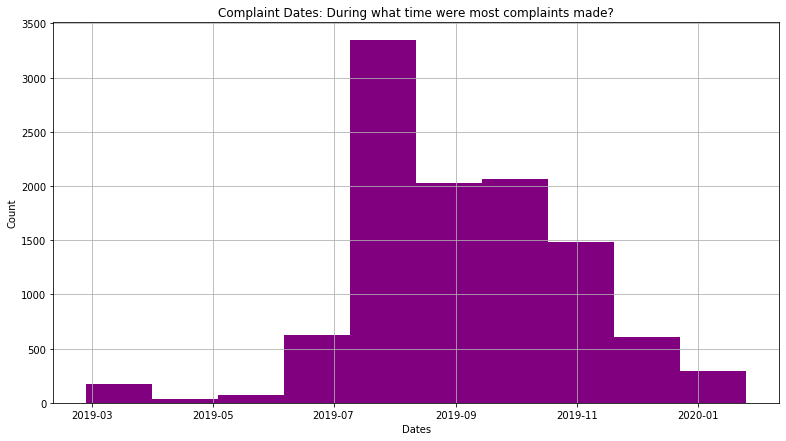

In [26]:
df.createdAt = pd.to_datetime(df['createdAt'])
plt.figure(figsize=(13,7))
plt.title("Complaint Dates: During what time were most complaints made?")
plt.xlabel('Dates')
plt.grid(True)
plt.ylabel('Count')
plt.hist(df.createdAt,color='purple')

In [27]:
dates = []
for i in df.createdAt:
    d = str(i).split('-')
    if d[1] == '08':
        dates.append(str(i))
    elif (d[1] == '07' or d[1] == '09'):
        d[1] = d[1].split(' ')
        if(int(d[1][0]) >=15 and int(d[1][0]) <= 31):
            dates.append(str(i))

In [28]:
print(df.status_id.unique())

[ 3  1 10  2  9  0]


{3: 1395, 1: 6483, 10: 2434, 2: 90, 9: 84, 0: 237}


([<matplotlib.patches.Wedge at 0x20acef29320>,
 [Text(1.0094007797205142, 0.4371613728357279, '3'),
  Text(-1.002225720748061, 0.45336917040203556, '1'),
  Text(0.6363271928651739, -0.897266796231939, '10'),
  Text(1.0748007953778522, -0.2341009403123708, '2'),
  Text(1.0853333548727413, -0.17902935178534315, '9'),
  Text(1.0973493520648703, -0.07631775365411146, '0')],
 [Text(0.5505822434839167, 0.23845165791039702, '13.01'),
  Text(-0.5466685749534878, 0.24729227476474663, '60.46'),
  Text(0.3470875597446403, -0.4894182524901485, '22.70'),
  Text(0.5862549792970103, -0.1276914219885659, '0.84'),
  Text(0.5920000117487679, -0.09765237370109625, '0.78'),
  Text(0.5985541920353837, -0.04162786562951534, '2.21')])

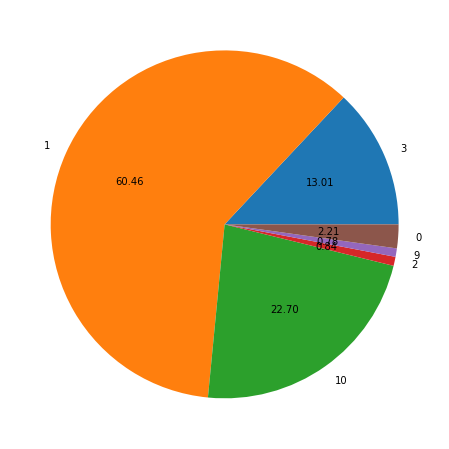

In [29]:
stat = {}
for i in df.status_id:
    if i not in stat:
        stat[i] = 1
    else:
        stat[i]+=1
print(stat)
plt.figure(figsize = (8,8))
plt.pie(stat.values(),labels = stat.keys(),autopct = "%.2f")

The status IDs :  {3: 1395, 1: 6483, 10: 2434, 2: 90, 9: 84, 0: 237}


<BarContainer object of 6 artists>

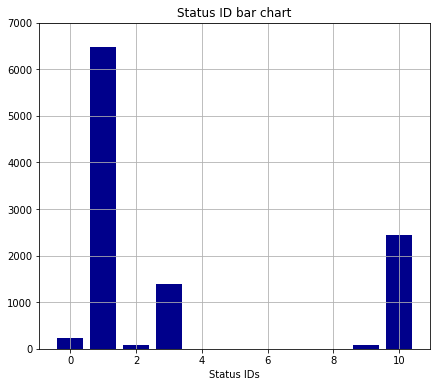

In [30]:
print("The status IDs : ",stat)
plt.figure(figsize = (7,6))
plt.title("Status ID bar chart")
plt.grid(True)
plt.xlabel("Status IDs")
plt.ylim(0,7000)
plt.bar(stat.keys(), height=stat.values(), color = 'darkblue')

{6: 1395}


([<matplotlib.patches.Wedge at 0x20acefad5c0>],
 [Text(-1.1, 1.3471114790620887e-16, '6')],
 [Text(-0.6, 7.347880794884119e-17, '100.00')])

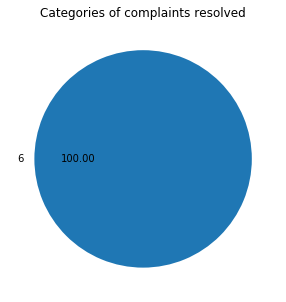

In [31]:
df1 = df[['category','status_id']]
#print(df1)
#for i in df1.categor
cat = list(df.category)
stat = list(df.status_id)
res = {}
for i in stat:
    if i==3:
        ct = cat[stat.index(i)]
        if ct not in res:
            res[ct] = 1
        else:
            res[ct]+=1
print(res)
plt.figure(figsize = (5,5))
plt.title("Categories of complaints resolved")
plt.pie(res.values(),labels = res.keys(),autopct = '%.2f')

35


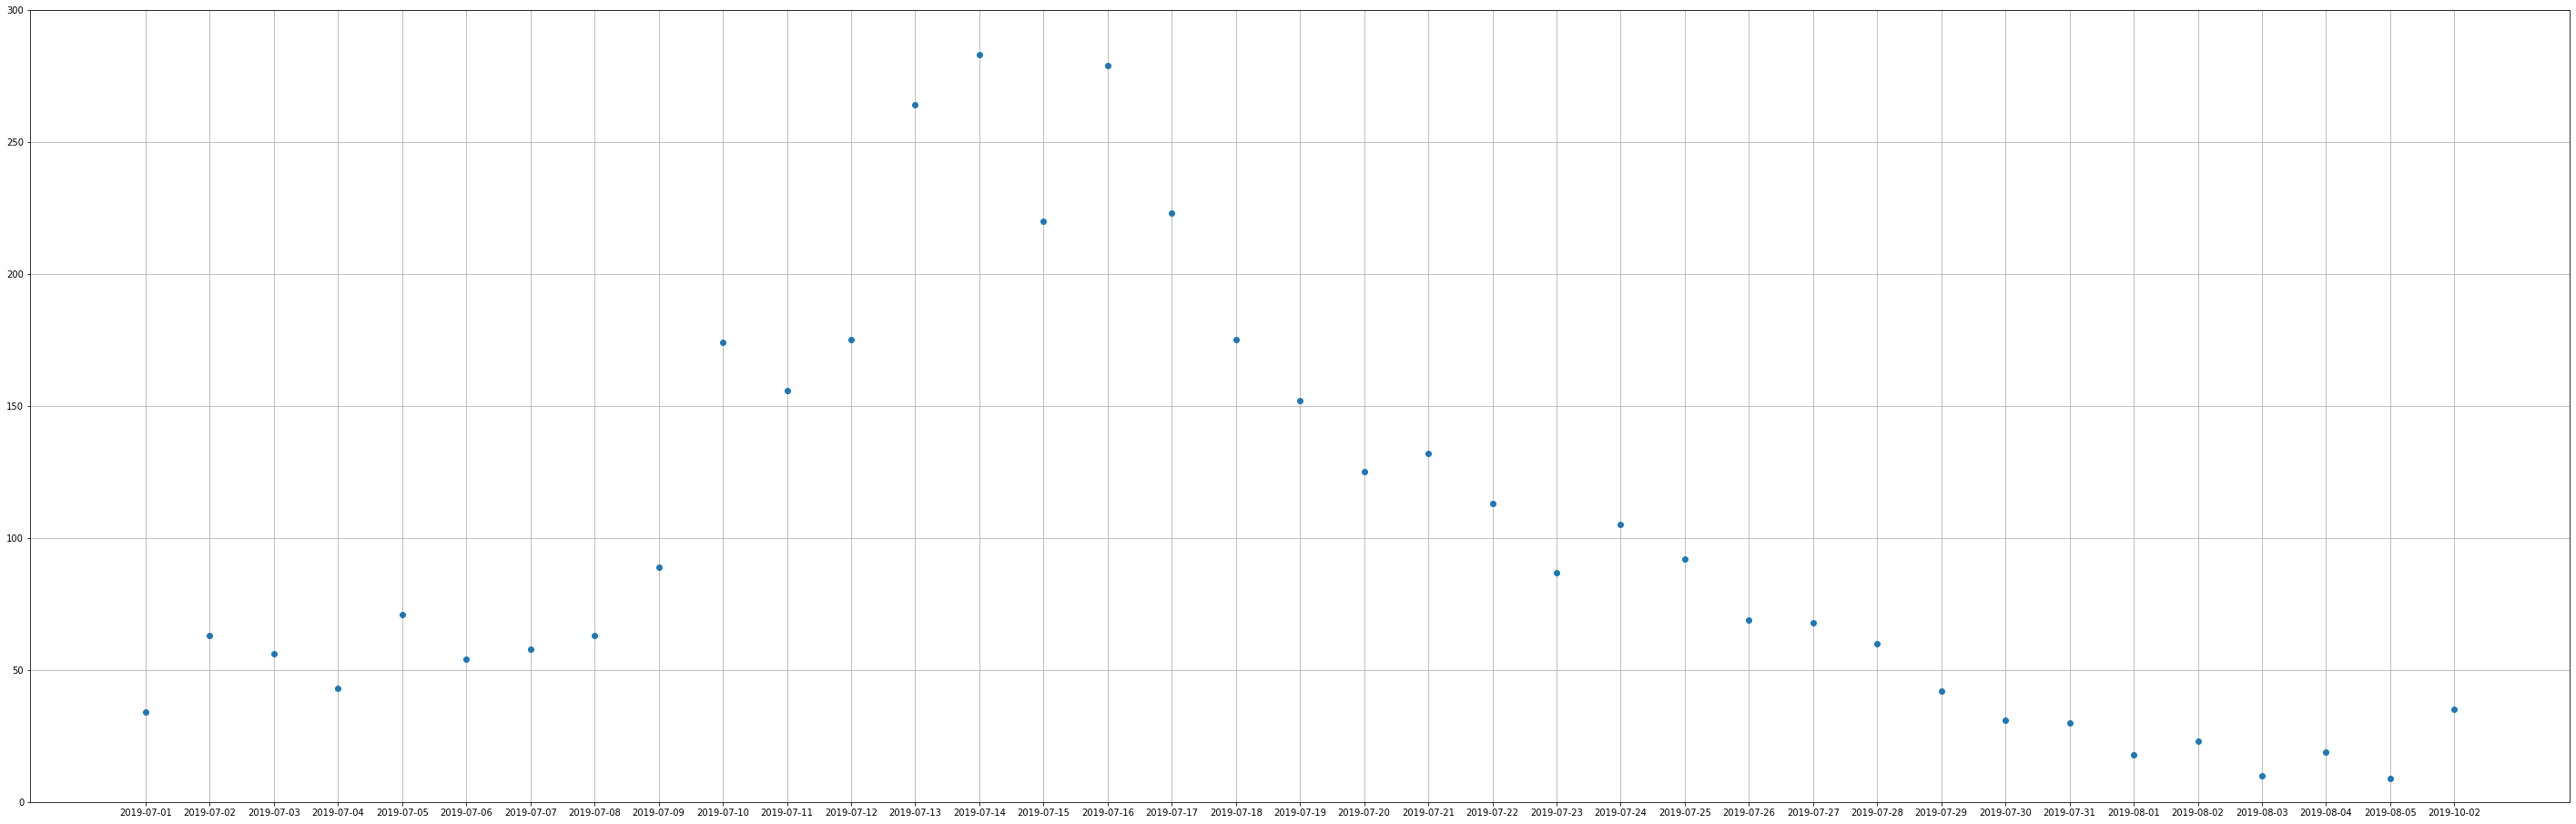

In [43]:
dates = []
for i in df.createdAt:
    d1 = str(i).split(' ')
    d = d1[0].split('-')
    if d[1] == '07':
        dates.append(d1[0])
    elif (d[1] == '08'):
        #d[1] = d[1].split(' ')
        if(int(d[2]) <=5):
            dates.append(d1[0])
    elif(d[1]=='10' and d[2]=='02'):
        dates.append(d1[0])
date = {}
for i in dates:
    if i not in date:
        date[i] = 1
    else:
        date[i]+=1
print(date['2019-10-02'])
plt.figure(figsize = (50,16))
plt.grid(True)
plt.ylim(0,300)
plt.plot_date(date.keys(),date.values())
#plt.hist(dates)

TypeError: unhashable type: 'dict_keys'

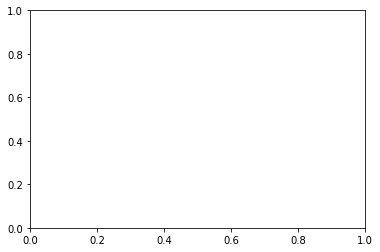

In [40]:
plt.plot(date.keys(),date.values())